<a href="https://colab.research.google.com/github/OverGeek/Face-Recognition-and-Verification/blob/master/Face_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAKE A LOOK AT - https://towardsdatascience.com/lossless-triplet-loss-7e932f990b24**

**BASE MODEL - INCEPTION V3**

In [0]:
from keras.applications.inception_v3 import InceptionV3
import keras.backend as K
import keras

In [132]:
model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (96, 96, 3))
x = model.output
#x = keras.layers.AveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation = 'sigmoid')(x)  #remove sigmoid activation, it is intended only for lossless_triplet_loss function
predictions = keras.layers.Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
model = keras.models.Model(inputs=model.input, outputs=predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 47, 47, 32)   864         input_27[0][0]                   
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, 47, 47, 32)   96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 47, 47, 32)   0           batch_normalization_471[0][0]    
__________________________________________________________________________________________________
conv2d_472

**DOWNLOADING AND PRE-PROCESSING DATASET**

In [0]:
!wget --header="Host: doc-14-9c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/my-drive" --header="Cookie: AUTH_4lgch8kproorp87c5erpsi9rqpbk46dg_nonce=sfd9nfe7nip5s" --header="Connection: keep-alive" "https://doc-14-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/hpmn37bmlnbtlqlvhcinu4v308u3jirv/1547956800000/14696292948499217652/14696292948499217652/1mINX6s9Ufxqi5_xpCDID8dnRjLbY7zB1?e=download&h=06864318269717761326&nonce=sfd9nfe7nip5s&user=14696292948499217652&hash=t7f80rqpa9s4s9iqkorcg9ndtr0i39lc" -O "lfw-deepfunneled.zip" -c

In [4]:
!unzip 'lfw-deepfunneled.zip'

Archive:  lfw-deepfunneled.zip
replace lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Guiel/Aaron_Guiel_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Patterson/Aaron_Patterson_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
  inflating: lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0002.jpg  
  inflating: lfw-deepfunneled/Aaron_Tippin/Aaron_Tippin_0001.jpg  
  inflating: lfw-deepfunneled/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg  
  inflating: lfw-deepfunneled/Abba_Eban/Abba

In [133]:
cd '/content/'

/content


In [134]:
import os as os
people = sorted(os.listdir('./lfw-deepfunneled'))
print(people)
print('numbe of different identities: ', len(people))

['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agn

In [7]:
import numpy as np
from PIL import Image
import random
from tqdm import tqdm

anch = []
pos = []
neg = []
for i in tqdm(range(len(people))):
  identity = people[i]
  if(len(os.listdir('lfw-deepfunneled/'+identity+'/')) > 1):
    for j in sorted(os.listdir('lfw-deepfunneled/'+identity+'/'))[:10]:
      anc_image = Image.open('lfw-deepfunneled/'+identity+'/'+j)
      anc_image = anc_image.resize((96, 96))
      for k in sorted(os.listdir('lfw-deepfunneled/'+identity+'/'))[:10]:
        pos_image = Image.open('lfw-deepfunneled/'+identity+'/'+k)
        pos_image = pos_image.resize((96, 96))
        
        if(pos_image == anc_image):
          pass
        else:
          neg_id = random.choice(os.listdir('lfw-deepfunneled/'))
          neg_img = random.choice(os.listdir('lfw-deepfunneled/'+neg_id+'/'))

          neg_image = Image.open('lfw-deepfunneled/'+neg_id+'/'+neg_img)
          neg_image = neg_image.resize((96, 96))

          anch.append(np.array(anc_image))
          pos.append(np.array(pos_image))
          neg.append(np.array(neg_image))

100%|██████████| 5749/5749 [03:20<00:00, 28.70it/s]


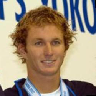

In [111]:
Image.fromarray(anch[3], mode = 'RGB')

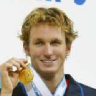

In [112]:
Image.fromarray(pos[3], mode = 'RGB')

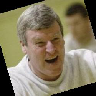

In [113]:
Image.fromarray(neg[3], mode = 'RGB')

In [114]:
anch = np.array(anch)
anch.shape

(29016, 96, 96, 3)

In [115]:
pos = np.array(pos)
pos.shape

(29016, 96, 96, 3)

In [116]:
neg = np.array(neg)
neg.shape

(29016, 96, 96, 3)

In [0]:
train_data = [anch[:28992, :, :, :], pos[:28992, :, :, :], neg[:28992, :, :, :]]

**ENCODINGS AND ERROR BEFORE TRAINING THE MODEL**

In [136]:
anch_encoding = model.predict(np.expand_dims(train_data[0][5], axis = 0))
pos_encoding = model.predict(np.expand_dims(train_data[1][5], axis = 0))
neg_encoding = model.predict(np.expand_dims(train_data[2][5], axis = 0))

pos_dist = np.sum((anch_encoding - pos_encoding)**2)
neg_dist = np.sum((anch_encoding - neg_encoding)**2)
print(pos_dist)
print(neg_dist)
print(pos_dist - neg_dist + 0.2)

0.21695748
0.25060272
0.16635475754737855


**DEFINING TRIPLET LOSS V1**

In [0]:
def triplet_loss(y_pred, alpha = 0.2):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    ### START CODE HERE ### (≈ 4 lines)
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.maximum(basic_loss, 0)
    ### END CODE HERE ###

    return loss

In [25]:
import tensorflow as tf
with tf.Session() as test:
    tf.set_random_seed(1)
    y_true = (None, None, None)
    y_pred = (tf.random_normal([3, 128], mean=6, stddev=0.1, seed = 1),
              tf.random_normal([3, 128], mean=1, stddev=1, seed = 1),
              tf.random_normal([3, 128], mean=3, stddev=4, seed = 1))
    loss = triplet_loss(y_pred)
    
    print("loss = " + str(loss.eval()))

loss = [441.77472    0.        86.367966]


In [0]:
def identity_loss(y_true, y_pred):
    return K.sum(y_pred)

**FACE RECOG MODEL USING LAMBDA FUNCTION WITH TRIPLET LOSS AND IDENTITY LOSS FUNCTION**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Model
import tensorflow as tf

def FRmodel(input_shape):
  
  anch_input = Input(input_shape)
  pos_input = Input(input_shape)
  neg_input = Input(input_shape)
  
  anch = model(anch_input)
  pos = model(pos_input)
  neg = model(neg_input)
  
  res = keras.layers.Lambda(triplet_loss)([anch, pos, neg])
  
  smodel = Model(inputs = [anch_input, pos_input, neg_input], outputs = res)
  return smodel
  

In [0]:
Fmodel = FRmodel((96, 96, 3))

In [29]:
Fmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128)          22065056    input_2[0][0]                    
                                                                 input_3[0][0]                    
          

In [0]:
Fmodel.compile(optimizer = 'adam', loss = identity_loss, metrics = ['mean_absolute_error'])

In [31]:
Fmodel.fit(train_data, np.zeros((train_data[0].shape[0], 1)), epochs = 1, batch_size = 32)

Epoch 1/1
28992/28992 [==============================] - 636s 22ms/step - loss: 4.5020 - mean_absolute_error: 0.1407


In [0]:
model.save_weights('epochs1.h5')

In [46]:
anch_encoding = model.predict(np.expand_dims(train_data[0][2991], axis = 0))
pos_encoding = model.predict(np.expand_dims(train_data[1][2991], axis = 0))
neg_encoding = model.predict(np.expand_dims(train_data[2][2991], axis = 0))

pos_dist = np.sum((anch_encoding - pos_encoding)**2)
neg_dist = np.sum((anch_encoding - neg_encoding)**2)
print(pos_dist)
print(neg_dist)
print(pos_dist-neg_dist+0.2)

print(anch[:1, :, :, :].shape)
Fmodel.predict([anch[28991:28992, :, :, :], pos[28991:28992, :, :, :], neg[28991:28992, :, :, :]])

0.0
0.0
0.2
Tensor("lambda_2/Maximum:0", shape=(?,), dtype=float32)
(1, 96, 96, 3)


array([0.2], dtype=float32)

**FACE RECOGNITION MODEL USING CONCAT LAYER AND TRIPLET LOSS  FUNCTION/ LOSSLESS TRIPLET LOSS FUNCTION**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Input, concatenate
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Model

def FRmodel(input_shape):
  
  anch_input = Input(input_shape)
  pos_input = Input(input_shape)
  neg_input = Input(input_shape)
  
  anch = model(anch_input)
  pos = model(pos_input)
  neg = model(neg_input)
  
  res = concatenate([anch, pos, neg])
  
  smodel = Model(inputs = [anch_input, pos_input, neg_input], outputs = res)
  return smodel

In [0]:
FRmodel = FRmodel((96, 96, 3))

In [139]:
FRmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
model_13 (Model)                (None, 128)          22065056    input_28[0][0]                   
                                                                 input_29[0][0]                   
          

In [0]:
def triplet_loss(y_true, y_pred, alpha = 10):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    
    anchor, positive, negative = y_pred[:,:128], y_pred[:,128:256], y_pred[:,256:]
    
    ### START CODE HERE ### (≈ 4 lines)
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0))
    ### END CODE HERE ###

    return loss

**DEFINING LOSSLESS TRIPLET LOSS FUNCTION**

In [0]:
def lossless_triplet_loss(y_true, y_pred, N = 128, beta = 128, epsilon=1e-8):
    """
    Implementation of the triplet loss function
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor data
            positive -- the encodings for the positive data (similar to anchor)
            negative -- the encodings for the negative data (different from anchor)
    N  --  The number of dimension 
    beta -- The scaling factor, N is recommended
    epsilon -- The Epsilon value to prevent ln(0)
    
    
    Returns:
    loss -- real number, value of the loss
    """
    anchor = tf.convert_to_tensor(y_pred[:,0:N])
    positive = tf.convert_to_tensor(y_pred[:,N:N*2]) 
    negative = tf.convert_to_tensor(y_pred[:,N*2:N*3])
    
    # distance between the anchor and the positive
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,positive)),1)
    # distance between the anchor and the negative
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,negative)),1)
    
    #Non Linear Values  
    
    # -ln(-x/N+1)
    pos_dist = -tf.log(-tf.divide((pos_dist),beta)+1+epsilon)
    neg_dist = -tf.log(-tf.divide((N-neg_dist),beta)+1+epsilon)
    
    # compute loss
    loss = neg_dist + pos_dist
    
    return loss

In [0]:
import tensorflow as tf
from keras.optimizers import Adam

opt = Adam(clipnorm=1)
FRmodel.compile(optimizer = opt, loss = lossless_triplet_loss, metrics = ['mean_absolute_error'])

In [0]:
FRmodel.fit(x = train_data, y = np.zeros((train_data[0].shape[0], 384)), epochs = 1, batch_size = 32)

In [127]:
anch_encoding = model.predict(np.expand_dims(train_data[0][5], axis = 0))
pos_encoding = model.predict(np.expand_dims(train_data[1][5], axis = 0))
neg_encoding = model.predict(np.expand_dims(train_data[2][5], axis = 0))

pos_dist = np.sum((anch_encoding - pos_encoding)**2)
neg_dist = np.sum((anch_encoding - neg_encoding)**2)
print(pos_dist)
print(neg_dist)
print(pos_dist - neg_dist)

nan
nan
nan


In [128]:
FRmodel.layers

In [0]:
from keras.models import Model

model = FRmodel  # include here your original model

layer_name = 'my_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[4].output)
intermediate_output = intermediate_layer_model.predict([np.expand_dims(train_data[0][5], axis = 0), np.expand_dims(train_data[1][5], axis = 0), np.expand_dims(train_data[2][5], axis = 0)])

In [130]:
intermediate_output[:128]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan